# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

## 读取数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("Iris.csv")

In [3]:
original_data = pd.read_csv("Iris.csv")

## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`original_data`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

清理后的数据放在`cleaned_data`

In [5]:
cleaned_data = original_data.copy()

### 数据整洁度

In [6]:
cleaned_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准,数据结构整齐

### 数据干净度

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


- 该数据不存在缺失值，不用处理缺失数据
- `Id`类型应该为`string`
- `Species`类型改为`category`

In [11]:
cleaned_data["Id"] = cleaned_data["Id"].astype("str")
cleaned_data["Id"]

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Id, Length: 100, dtype: object

In [12]:
cleaned_data["Species"] = cleaned_data["Species"].astype("category")
cleaned_data["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: Species, Length: 100, dtype: category
Categories (2, object): ['Iris-setosa', 'Iris-versicolor']

#### 处理缺失数据

无缺失数据，不需要处理

#### 处理重复数据

In [13]:
cleaned_data.duplicated().sum()

0

没有重复数据，无需处理

#### 处理不一致数据

只有`Species`可能存在不一致数据

In [15]:
cleaned_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

结果说明没有不一致数据

#### 处理错误数据

In [17]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


从以上统计信息来看，`cleaned_data`里不存在脱离现实意义的数值。

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异。

那么我们可以对数据基于`Species`列，先把各个鸢尾花种类样本数据筛选出来。

In [18]:
iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
iris_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
len(iris_setosa)

50

In [20]:
iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
iris_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [21]:
len(iris_versicolor)

50

## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索`Setosa`和`Versicolor`这两种鸢尾花的变量特点。

针对数值，我们可以直接绘制成对图，利用其中的密度图查看不同变量的分布，以及利用散点图了解变量之间的关系。

并且，由于此次分析目的是了解不同种类鸢尾花的属性特征是否存在差异，我们可以利用颜色对图表上不种类类的样本进行分类。

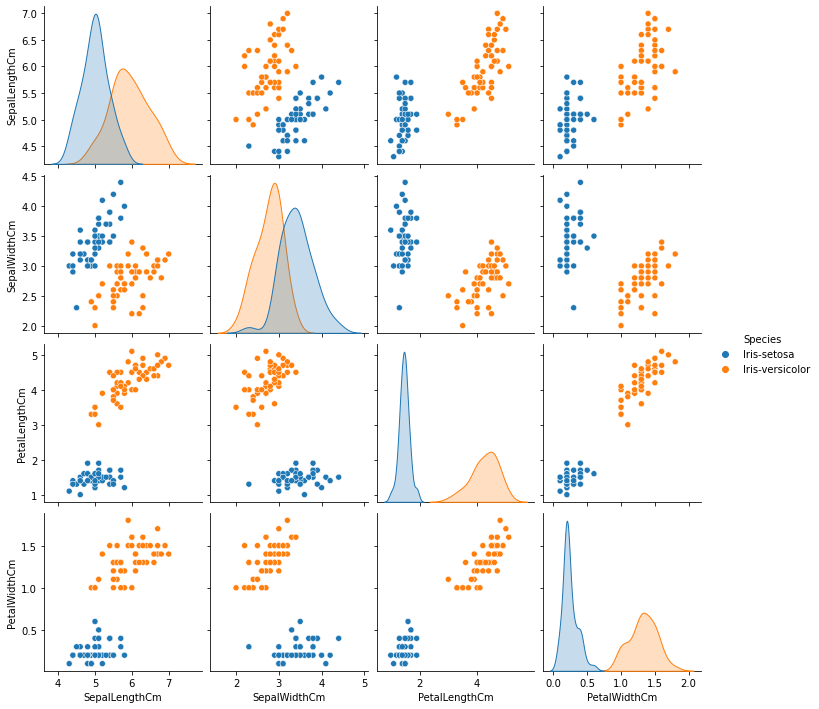

In [23]:
sns.pairplot(cleaned_data, hue="Species")
plt.show()

从以上可以看出，`Setosa`和`Versicolor`样本的花瓣长度以及花瓣宽度的分布存在明显数值上的不同，已经可以猜测假设检验的结果是，两种鸢尾花的花瓣长度与宽度有统计显著性差异。

萼片的长度和宽度在分布上存在重叠，暂时无法仅通过图表下结论，需要进行假设检验，来推断总体的萼片长度和宽度之间是否有差异。

## 分析数据

我们将利用假设检验，依次检验`Setosa`和`Versicolor`这两种鸢尾花在萼片、花瓣的长度和宽度平均值方面，是否存在统计显著性差异。

由于我们只有样本数据，不知道总体的标准差，加上两组样本数各为50，样本数量不大，因此进行t检验，而不是z检验。假设此数据集样本符合t检验的两个前提：样本为随机抽样，总体呈正态分布。

我们先引入t检验所需要的模块。

In [25]:
from scipy.stats import ttest_ind

### 分析萼片长度

Setosa 和 Versicolor 萼片长度的分布如下。

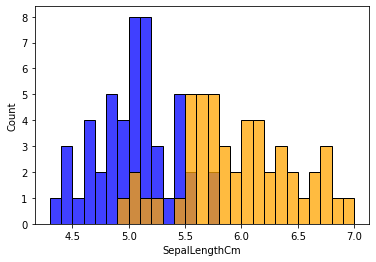

In [29]:
sns.histplot(iris_setosa['SepalLengthCm'],binwidth=0.1,color="blue")
sns.histplot(iris_versicolor['SepalLengthCm'],binwidth=0.1,color="orange")
plt.show()

#### 建立假设

$H_0$:Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值不存在显著区别。  

$H_1$:Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。

#### 确认检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以是双尾检验。

#### 确定显著水平

我们将选择0.05作为显著水平。

#### 计算t值和p值

In [31]:
t_stat,p_value = ttest_ind(iris_setosa['SepalLengthCm'],iris_versicolor['SepalLengthCm'])

In [32]:
print(t_stat,p_value)

-10.52098626754911 8.985235037487077e-18


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。

### 分析萼片宽度

Setosa 和 Versicolor 萼片长度的分布如下。

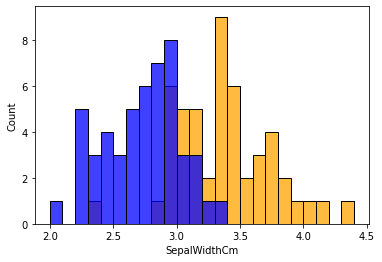

In [40]:
sns.histplot(iris_setosa['SepalWidthCm'], binwidth=0.1,color='orange')
sns.histplot(iris_versicolor['SepalWidthCm'], binwidth=0.1,color='blue')
plt.show()

#### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著区别。

#### 确认检验是单尾还是双尾

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更宽，所以是双尾检验。

#### 确定显著水平

我们将选择0.05作为显著水平。

#### 计算t值和p值

In [42]:
t_stat, p_value = ttest_ind(iris_setosa["SepalWidthCm"], iris_versicolor["SepalWidthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：9.282772555558111
p值：4.362239016010214e-15


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著区别。

### 分析花瓣长度

Setosa 和 Versicolor 花瓣长度的分布如下。

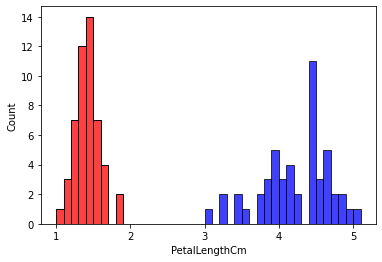

In [46]:
sns.histplot(iris_setosa['PetalLengthCm'], binwidth=0.1,color = 'red')
sns.histplot(iris_versicolor['PetalLengthCm'], binwidth=0.1,color='blue')
plt.show()

#### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。

确定为双尾，显著性水平0.05

#### 计算t值和p值

In [48]:
t_stat, p_value = ttest_ind(iris_setosa["PetalLengthCm"], iris_versicolor["PetalLengthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-39.46866259397272
p值：5.717463758170621e-62


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。

### 分析花瓣宽度

Setosa 和 Versicolor 花瓣宽度的分布如下。

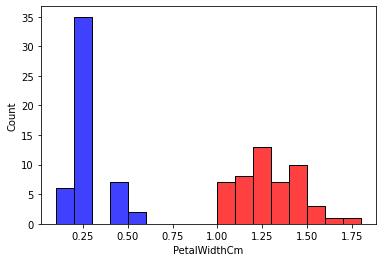

In [52]:
sns.histplot(iris_setosa['PetalWidthCm'], binwidth=0.1,color = 'blue')
sns.histplot(iris_versicolor['PetalWidthCm'], binwidth=0.1,color='red')
plt.show()

#### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值存在显著区别。

确定为双尾，显著性水平0.05

In [55]:
t_stat, p_value = ttest_ind(iris_setosa["PetalWidthCm"], iris_versicolor["PetalWidthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-34.01237858829048
p值：4.589080615710866e-56


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值存在显著区别。

## 结论

通过推论统计学的计算过程，我们发现，Setosa鸢尾花和Versicolor鸢尾花萼片、花瓣的长度和宽度平均值，均存在具有统计显著性的差异。